<a href="https://colab.research.google.com/github/EirafWali/GEOL558-unsupervised-corals/blob/main/Unsupervised_corals_EDA_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML: Corals dataset for coral clustering.
#### By: Eiraf Wali Dawoud
##### 1/16/2025

#### Dataset Source:
https://www.kaggle.com/code/artemborzenko/distribution-of-coral-reefs/notebook

The dataset can be found in:

https://raw.githubusercontent.com/EirafWali/GEOL558-unsupervised-corals/main/corals_worldwide_dataset.csv

---
#### About the dataset:
- The dataset contains different oceanic systems' factors that can affect the corals ecosystem. These include the water salinity and temprature which will be of interest in this study.

---
#### Objective:
This study will look into different clustering methods using saliniy and temperature data for corals. This will help in understanding the favored environments for corals habitats.

#### Importance:
This study can help marine scientists and geoscientists to understand coral colonies' behaviour with different oceanic environmental factors.

#### Methods
- K-mean clustering
- DBSCAN
- GMM


### This notebook is dedicated to load, clean, understand, and visualize the dataset before applying the unsupervised ML.
---


## Section 1: Import and clean the dataset

In [24]:
# install basemap for mapping
!pip install basemap


In [25]:
# Import the needed libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from sklearn.mixture import GaussianMixture

In [26]:
# Reading the data from github for easy access by the public

# file path from github repo:
file_path = "https://raw.githubusercontent.com/EirafWali/GEOL558-unsupervised-corals/main/corals_worldwide_dataset.csv"

#read the csv
df_corals = pd.read_csv(file_path)

# Display the header of the datarame with the first 5 rows
df_corals.head()

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
0,Adriatic Sea,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,Adriatic Sea,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,Adriatic Sea,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,Adriatic Sea,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,Adriatic Sea,38.519196,15.733400,21.824799,138000,43,15,2,1,0


In [27]:
# In this code box are some Exploratory data analysis (EDA) of the dataset and printing the results.

# Understanding basic information about the dataset
print('Below are some general information on the dataset:')
print(df_corals.info())

# Looking into some statistics
print('The following information are some statistical overview:')
print(df_corals.describe())

# Check the size of the dataset by the shape to see if it fulfills the assignment requirement
print('The size of this dataset is:',df_corals.shape, 'rows and columns respectively')

Below are some general information on the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2451 non-null   object 
 1   salinity      2451 non-null   float64
 2   January_temp  2451 non-null   float64
 3   June_temp     2451 non-null   float64
 4   area          2451 non-null   int64  
 5   latitude      2451 non-null   int64  
 6   longitude     2451 non-null   int64  
 7   type of sea   2451 non-null   int64  
 8   corals        2451 non-null   int64  
 9   silt/sulfide  2451 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 191.6+ KB
None
The following information are some statistical overview:
          salinity  January_temp    June_temp          area     latitude  \
count  2451.000000   2451.000000  2451.000000  2.451000e+03  2451.000000   
mean     32.819880     18.026784    21.612658  1

In [28]:
# This code box looks into the data and checks if there is any missing values in all the columns.

# looking for missing values and giving the sum in each column
missing_data = df_corals.isnull().sum()
print(missing_data)

name            0
salinity        0
January_temp    0
June_temp       0
area            0
latitude        0
longitude       0
type of sea     0
corals          0
silt/sulfide    0
dtype: int64


Note:

Luckily, the CSV containing the data has no missing values in any of the columns and rows.

The data is clean to work with directly.

## Section 2: Visualization

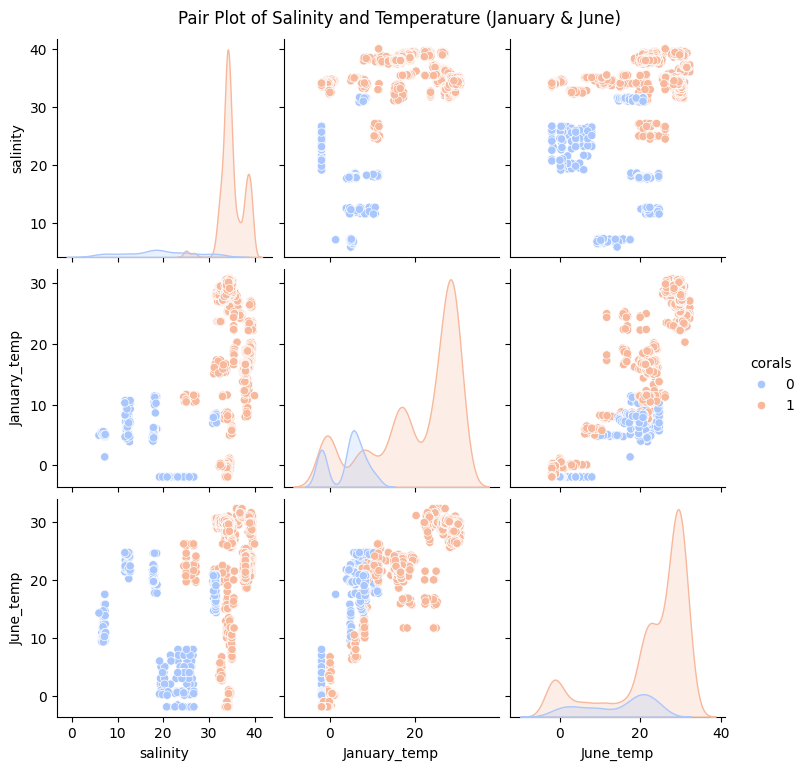

In [29]:
# In this code box is a Seaborn pair plot using seaborn library to understand the saliniy and temperature in both months (January and June)
# Figure 1:

# Create the pair plot using seaborn
sns.pairplot(
    df_corals,
    vars=['salinity', 'January_temp', 'June_temp'],  # Select the needed variables for the plot
    hue='corals',  # Color points by the 'corals' column (present or not present)
    palette='coolwarm'
)

# Add a title to the plot
plt.suptitle("Pair Plot of Salinity and Temperature (January & June)", y=1.02)

# Display the plot
plt.show()

## Figure 1: Pair plot for salinity and temperature in January and June.

In the  pair plot we can visualize some clusters as 0 and 1 which in the context of our dataset means corals are present or non-present.

Additionally, we can see that most of the points of present corals (orange color) are clustered at the range of salinity (25 to 42) parts per thousand.

While the temperatures in both months vary from 0 to 40 degrees Celsius, which does not give any clear conclusion to the analysis.

Next, is a correlation matrix heat map for the dataset.

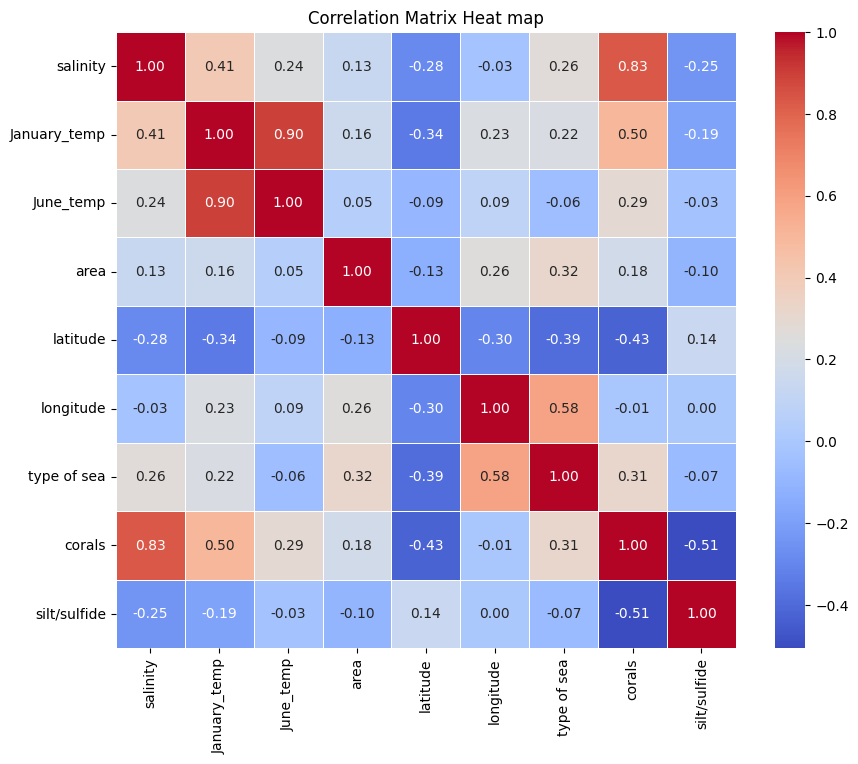

In [30]:
# This code box is to plot a correlation matrix heat map of the dataset
# Figure 2:

# Correlation matrix for numeric columns only
correlation_matrix = df_corals.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap='coolwarm',  # Color palette
    fmt='.2f',  # Format for the numbers
    linewidths=0.5  # Line width between cells
)

# Add a title
plt.title("Correlation Matrix Heat map")

# Display the plot
plt.show()

## Figure 2: Correlation Matrix Heat Map

### Observations:

Salinity:

- High correlation with coral presence (0.83):

  - Shows a strong positive correlation suggesting that areas with higher salinity levels are more likely to have coral presence.

- Moderate correlation with January_temp (0.41):
  - Shows that salinity increases at January temperatures.

- Weak correlation with June_temp (0.24):
  - Shows little relationship between salinity and summer temperatures.


January Temperature:
- Moderate correlation with Coral Presence (0.50):
  - Shows that higher temperatures in January might positively influence coral presence.

June Temperature:
- Weak correlation with Coral Presence (0.29):
  - Shows weaker relationship with corals compared to January temperatures.

Coral Presence:
- Strong influence by Salinity (0.83) and moderate influence by January_temp (0.50):
  - Shows that salinity plays the bigger role in coral presence.
- Negative influence by Silt/Sulfide (-0.51):
  - Shows that areas with high silt and sulfide content would have less corals.



#### Now let's look into salinity variation with areas with corals peresent and areas with corals non-present.

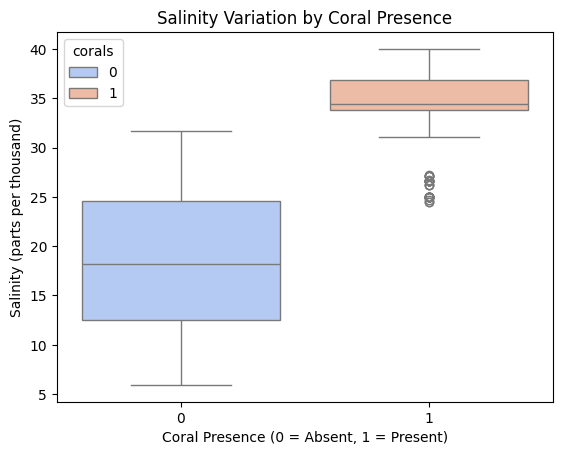

In [31]:
# This code box is to plot a box plot to see the salinity variations with corals presence.
# Figure 3:

# Plot the box plot
sns.boxplot(data=df_corals,
            x='corals', y='salinity',
            hue='corals',                # color it by the corals presence
            palette='coolwarm'
            )

# Add title and labels
plt.title("Salinity Variation by Coral Presence")
plt.xlabel("Coral Presence (0 = Absent, 1 = Present)")
plt.ylabel("Salinity (parts per thousand)")

# Display the plot
plt.show()

## Figure 3: Salinity Variation by Coral Presence (Box Plot)

### Observations:

- The median salinity for areas with coral presence is higher than the areas with corals absence.
This can mean that corals tend to thrive at saltier environments.

- At areas with presence of corals, the interquartile range seems to be narrower, which means that corals thrive within a specific salinity range.
On the other hand, areas with absence of corals, tend to have a wider salinity range, showing more variability.

- There are outliers in the salinity of areas of present corals representing some corals can accomodate to lower salinity ranges.

In [32]:
# This code box is to look into the salinity thresholds for coral presence
# Calculate the min, max, and interquartile range (IQR) for salinity in coral-present regions

# Filter the data for only the coral-present areas (corals = 1)
coral_present_salinity = df_corals[df_corals['corals'] == 1]['salinity']

# Calculate some salinity statistics
salinity_stats = {
    "Minimum salinity for coral presence": coral_present_salinity.min(),
    "Maximum salinity for coral presence": coral_present_salinity.max(),
    "Median salinity for coral presence": coral_present_salinity.median(),
    "25th Percentile": coral_present_salinity.quantile(0.25),
    "75th Percentile": coral_present_salinity.quantile(0.75),
}


# Display the results of statistics
salinity_stats

{'Minimum salinity for coral presence': 24.4971199,
 'Maximum salinity for coral presence': 40.0,
 'Median salinity for coral presence': 34.460935594999995,
 '25th Percentile': 33.790344239999996,
 '75th Percentile': 36.89338303}

In [33]:
# Print the coral-friendly salinity range based on the previous code
print('Most coral-friendly areas have a salinity that is within:',
      f"{coral_present_salinity.quantile(0.25):.2f}",
      'parts per thousand and',
      f"{coral_present_salinity.quantile(0.75):.2f}",'parts per thousand.')


Most coral-friendly areas have a salinity that is within: 33.79 parts per thousand and 36.89 parts per thousand.


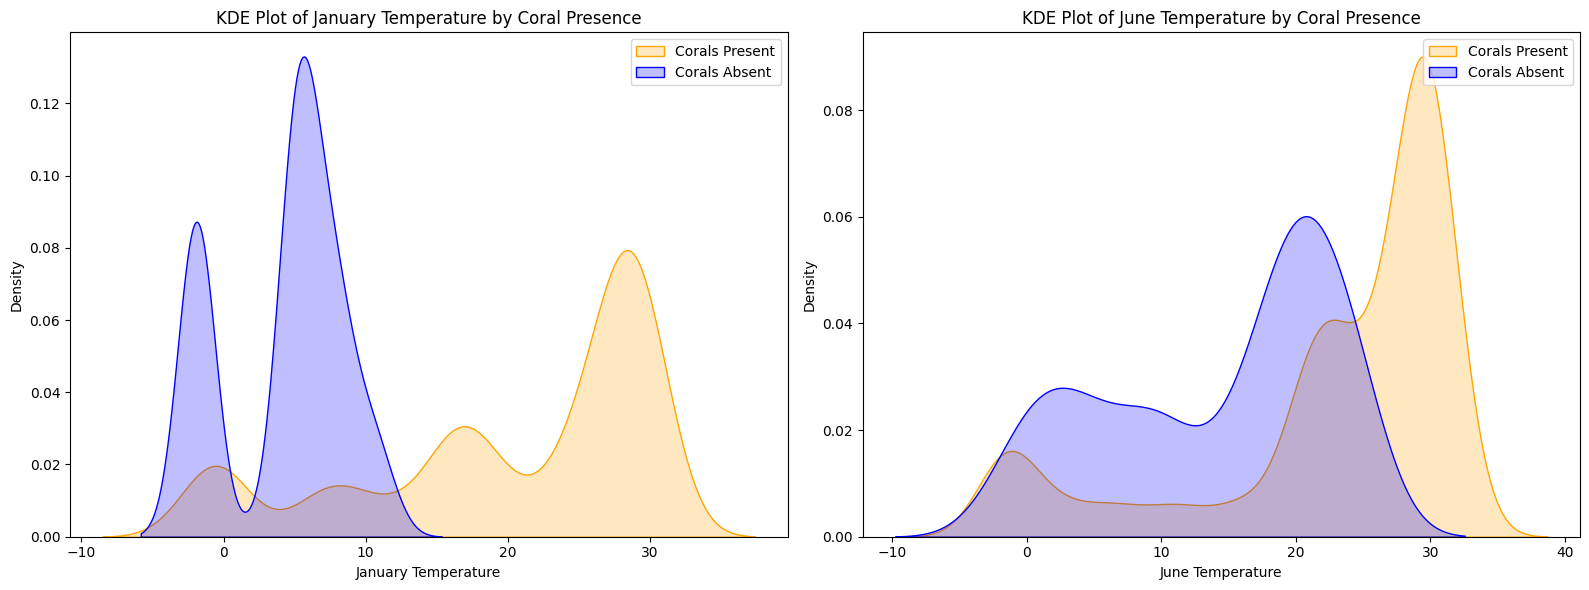

In [34]:
# This code box is to plot 2 KDE plots for the coral presence in both months' temperatures
# Figure 4:

# Initiate the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for January Temperature
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 1],  # Filter data for coral present
    x='January_temp',
    label='Corals Present',
    fill=True,
    color='orange',
    ax=axes[0]
)
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 0],  # Filter data for coral absent
    x='January_temp',
    label='Corals Absent',
    fill=True,
    color='blue',
    ax=axes[0]
)

# Add title, labels, and legend
axes[0].set_title("KDE Plot of January Temperature by Coral Presence")
axes[0].set_xlabel("January Temperature")
axes[0].set_ylabel("Density")
axes[0].legend()

# KDE plot for June Temperature
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 1],  # Filter data for coral present
    x='June_temp',
    label='Corals Present',
    fill=True,
    color='orange',
    ax=axes[1]
)
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 0],  # Filter data for coral absent
    x='June_temp',
    label='Corals Absent',
    fill=True,
    color='blue',
    ax=axes[1]
)

# Add title, labels, and legend
axes[1].set_title("KDE Plot of June Temperature by Coral Presence")
axes[1].set_xlabel("June Temperature")
axes[1].legend()

# Adjust layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

## Figure 4: KDE Plots

### Observations:
The KDE plot shows the distribution of temperatures in January on the left, and June on the right for areas with coral presence in orange color and absence in blue.

In January, precent corals show a higher peak around 25–30°C, while absent corals show peaks at cooler temperatures (around 0–10°C) which indicates corals preference to warmer temperatures.

Similarly, in June, corals favor higher temperatures near 25–30°C, while abcence of corals show a broad distriution across cooler ranges.

In [35]:
# Figure 5: Interactive folium map with the locations of corals presence
# The size of the points is by January's temperature.

# Filter the dataset to include only coral present locations
corals_presence = df_corals[df_corals['corals'] == 1]

# Calculate the map center based on coral presence
map_center = [corals_presence['latitude'].mean(), corals_presence['longitude'].mean()]

# To change the map to English labels (my settings shows arabic, hence, I have to change it to English)
m = folium.Map(location=map_center, zoom_start=2, tiles='CartoDB positron')

# Add markers for coral-present locations and make the size correspond to the temperature in January.
for _, row in corals_presence.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['January_temp'] / 5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
    ).add_to(m)

m

## Figure 5: Interactive folium map with the locations of corals presence

We can note that corals are mostly clustered at the Adriatic Sea, Red sea, Mediterranean Sea, Molucca Sea, and the Mozambique Channel.


## Section 3: Pre-processing and Scaling

###  Z-Score Normalization

The following section is for normalizing the dataset by Z-score normalization method.

### How does it work?
The normalization method I am using is z-normalization (also called standardization), where each feature is scaled to have a mean of 0 and a standard deviation of 1

### Why am I scaling?
I am scaling before performing the clustering as the K-mean is sensitive to Euclidean Distances. Which means that the clustering is sensitive to the scale of features because it uses Euclidean distance for calculations. Z-normalization ensures that all features contribute equally regardless of their original scale.

In [37]:
# This code box is dedicated to scale the data by Z-score normalization

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
# The (fit) method calculates the mean and standard deviation for each column
# The (transform) method performs the Z-Score transformation to standardize the data
standardized_data = scaler.fit_transform(df_corals[['salinity', 'January_temp', 'June_temp']])

# Convert the standardized data back into a DataFrame for easier use and visualization
standardized_df = pd.DataFrame(standardized_data, columns=['salinity', 'January_temp', 'June_temp'])

# Display the first few rows of the standardized DataFrame
print(standardized_df.head())

# Explanation:
# 1. Each column in `standardized_df` now has a mean of 0 and a standard deviation of 1.
# 2. This ensures all features contribute equally to the clustering or PCA.


   salinity  January_temp  June_temp
0  0.827098     -0.213955  -0.075035
1  0.828062     -0.156283  -0.209192
2  0.851783     -0.160394  -0.256024
3  0.800388     -0.209374   0.125859
4  0.860412     -0.207215   0.021018


After the Z-score normalization, I will plot the same pair plot to see the new standarized values in the next code box

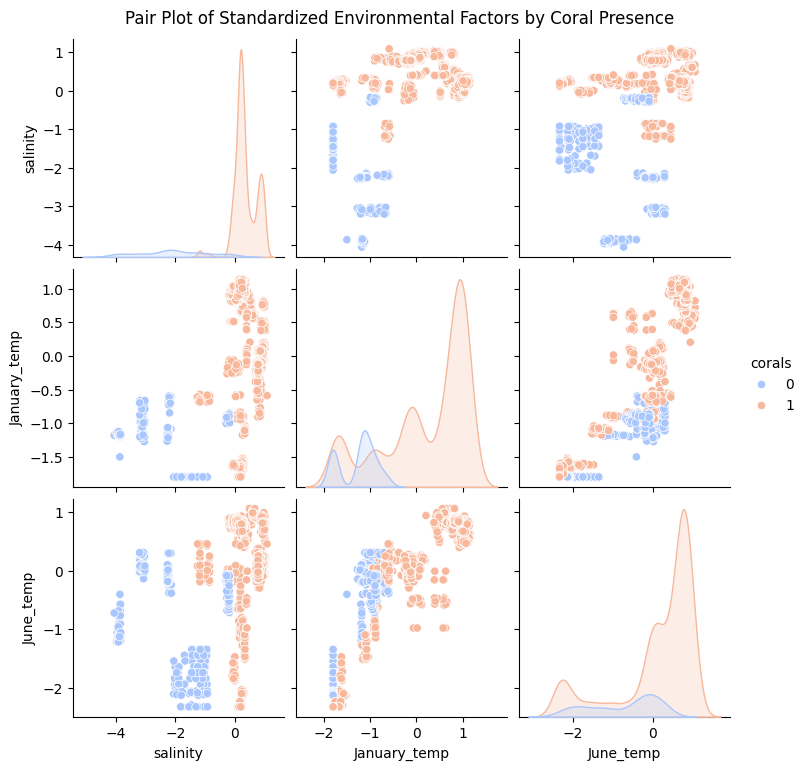

In [38]:
# Figure 6: Pair plot of the standarized dataset
# Ensure the 'corals' column is included in the standardized DataFrame for coloring
standardized_df['corals'] = df_corals['corals'].reset_index(drop=True)

# Create a pair plot using the standardized data
sns.pairplot(
    standardized_df,
    vars=['salinity', 'January_temp', 'June_temp'],
    hue='corals',  # Color points by the corals presence
    palette='coolwarm',
)

# Add a title to the plot
plt.suptitle("Pair Plot of Standardized Environmental Factors by Coral Presence", y=1.02)

# Display the plot
plt.show()

## Section 4: K-mean Clustering and Silhouette scoring:




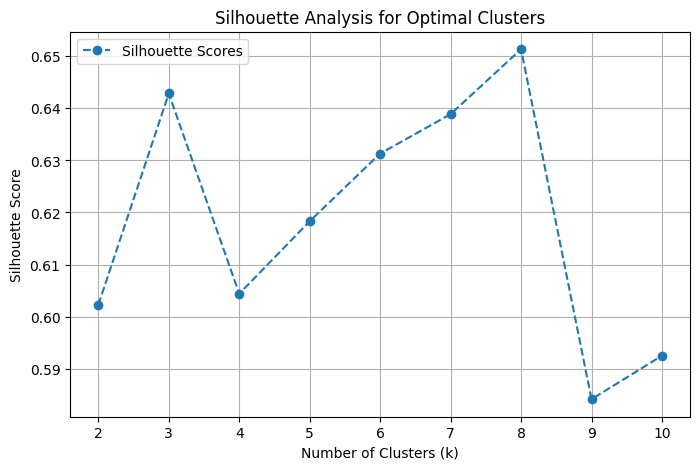

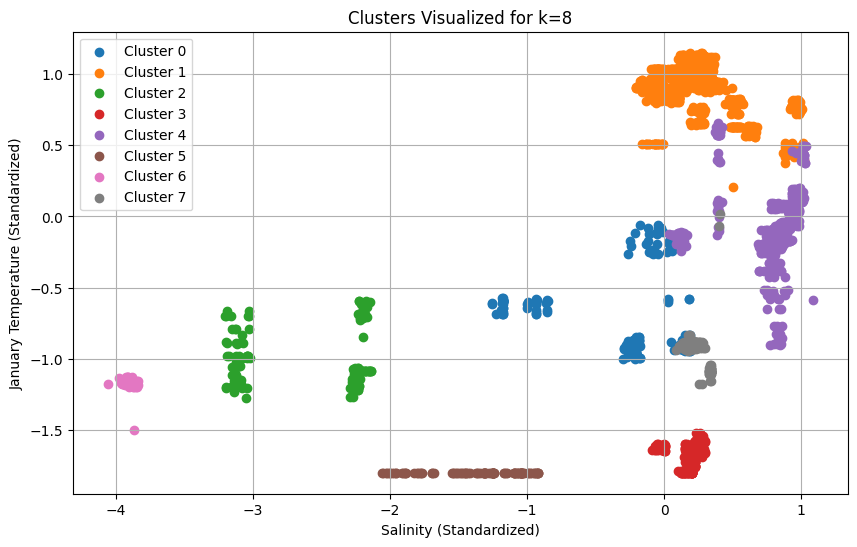

The optimal clusters number is: 8


In [39]:
# This code box is didecated to perform k-mean clustering and silhouette scoring.
# Figures 7 & 8: Silhouette scores and k-mean clusters
# Initialize the range of clusters from 2 to 10.
range_clusters = range(2, 11)
# Initialize the silhouette score variables
silhouette_scores = []

# Loop to calculate the k-mean with the chosen range
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(standardized_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(standardized_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the silhouette scores
optimal_k = range_clusters[silhouette_scores.index(max(silhouette_scores))]

# Apply K-Means clustering with the resulted number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
kmeans_optimal.fit(standardized_df)
standardized_df['Cluster'] = kmeans_optimal.labels_

# Plot the silhouette scores to evaluate the cluster
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', label='Silhouette Scores')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot clusters for visualization
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = standardized_df[standardized_df['Cluster'] == cluster]
    plt.scatter(cluster_data['salinity'], cluster_data['January_temp'], label=f'Cluster {cluster}')

plt.title(f'Clusters Visualized for k={optimal_k}')
plt.xlabel('Salinity (Standardized)')
plt.ylabel('January Temperature (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

# print the optimal clusters number
print ('The optimal clusters number is:',optimal_k)

### Figures 7 & 8: Silhouette scores and k-mean clusters:
Figure 7: The silhouette scores plot shows that the optimal number of clusters for this dataset is 8.

Figure 8: The scatter plot at the bottom shows the clustering of the data points based on standardized salinity and January temperature. Each cluster represents a group with similar characteristics in these features.

To put more context to this result, The two codes below will look into the statistics and create a map to visualize coral presence and cluster distribution globally.

In [ ]:
# This code looks into the statistics of the clusters for better quantifying and understanding.

# Calculate cluster statistics
cluster_details = standardized_df.groupby('Cluster').agg(['mean', 'std', 'count'])

# Reset the index for better readability
cluster_details = cluster_details.reset_index()

# Display the cluster details
cluster_details

Cluster  salinity                 January_temp                 June_temp  \
               mean       std count         mean       std count      mean   
0       0  0.262671  0.262429  1156     0.904304  0.162864  1156  0.764904   
1       1  0.781798  0.216789   482    -0.058640  0.281425   482  0.044697   
2       2 -0.351231  0.478902   154    -0.692097  0.276568   154 -0.102738   
3       3  0.155138  0.097639   244    -1.681510  0.075090   244 -2.152253   
4       4 -3.902948  0.043791    49    -1.173963  0.051906    49 -1.012686   
5       5  0.265096  0.073230   121    -0.966845  0.156490   121 -1.109265   
6       6 -2.522054  0.421737   147    -1.015528  0.194880   147  0.012084   
7       7 -1.370703  0.343291    98    -1.800448  0.000000    98 -1.864646   

                     corals                 
        std count      mean      std count  
0  0.132363  1156  1.000000  0.00000  1156  
1  0.257783   482  1.000000  0.00000   482  
2  0.244935   154  0.681818  0.46729   154  
3  0.222961   244  1.000000  0.00000   244  
4  0.228334    49  0.000000  0.00000    49  
5  0.299710   121  1.000000  0.00000   121  
6  0.219983   147  0.000000  0.00000   147  
7  0.289058    98  0.000000  0.00000    98

#### Observations:

This shows that we have 8 clusters with different statistical analysis.
the largest cluster contains 1156 samples and the smallest cluster contains 49 corals.

Note: this analysis does not make sense with the domain knowledge.
I will examine other methods of clustering in the following codes

<ipython-input-20-142e5fc20d25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['Cluster'] = standardized_df['Cluster']
<ipython-input-20-142e5fc20d25>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['corals'] = df_corals['corals']


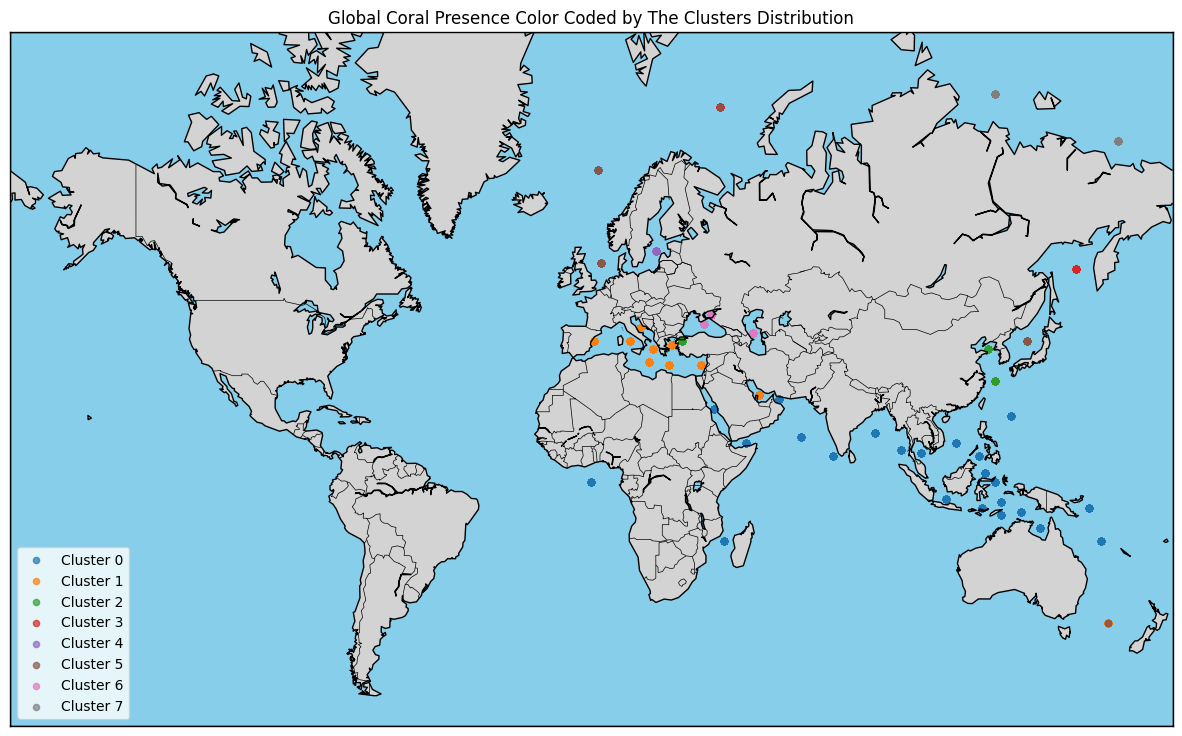

In [ ]:
# This code is for plotting the coral present areas in a map and color code it by the clusters.
# Figure 9: Map View with corals present color-coded by the clusters of the k-mean.

# Initialize latitude, longitude, clusters, and coral presence for mapping
locations = df_corals[['latitude', 'longitude']]
locations['Cluster'] = standardized_df['Cluster']
locations['corals'] = df_corals['corals']

# Create a map to visualize coral presence color coded by clusters distribution
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc',
            llcrnrlat=-60, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='skyblue')
m.drawmapboundary(fill_color='skyblue')

# Plot the clusters
for cluster in range(standardized_df['Cluster'].nunique()):
    cluster_data = locations[locations['Cluster'] == cluster]
    x, y = m(cluster_data['longitude'].values, cluster_data['latitude'].values)
    m.scatter(x, y, label=f'Cluster {cluster}', alpha=0.7, s=20)

plt.title('Global Coral Presence Color Coded by The Clusters Distribution')
plt.legend()
plt.show()


## Figure 9: Map View with corals present color-coded by the clusters of the k-mean.

### Observations:

#### Cluster 0: High Coral Presence

The mean coral presence for this cluster is higher than the others. Suggesting that regions in this cluster likely have better environmental conditions that are suitable for coral growth.

#### Cluster 1: Moderate Coral Presence

Cluster 1 has a moderate mean coral presence, with variability in coral counts. This suggests a transitional zones where environmental conditions might be less stable or near the tolerance thresholds for corals.

#### Cluster 2: Low Coral Presence

This cluster has the lowest mean coral presence and the smallest count. This indicates that regions in Cluster 2 have harsher environmental conditions that are unsuitable for coral growth.


## Section 5: DBSCAN Clustering and Silhouette scoring:


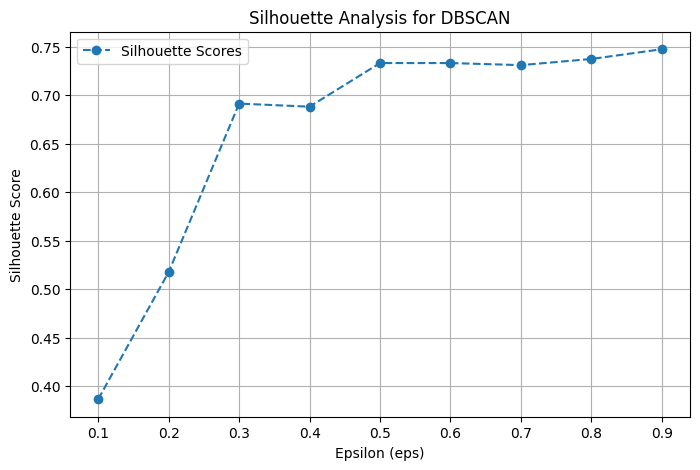

Optimal epsilon based on silhouette score is: 0.9


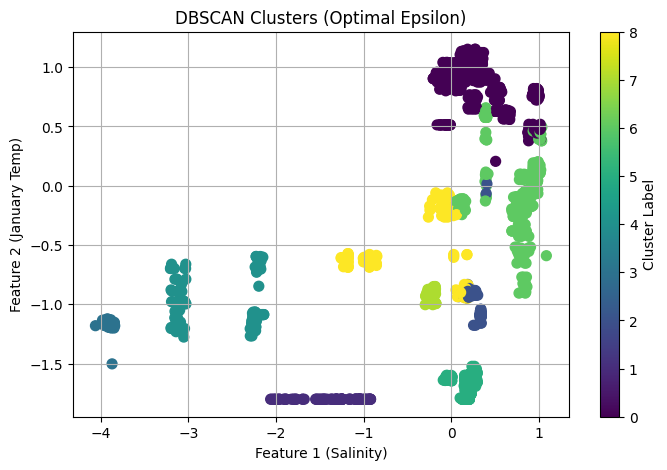

In [ ]:
# This code performs DBSCAN clustering and silhouette scoring for the dataset.
# Figure 10: Silhouette analysis for DBSCAN
# Figure 11: DBSCAN Clusters (Optimal Epsilon)


# Define epsilon values
eps_values = np.arange(0.1, 1.0, 0.1)

# Initialize a list for storing silhouette scores for each epsilon value
silhouette_scores = []

# Ensure consistent data by resetting random state before shuffling or sampling
standardized_df = standardized_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Loop through each epsilon value to fit and evaluate DBSCAN
for eps in eps_values:
    # Initialize DBSCAN with the current epsilon and a minimum sample size of 5
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(standardized_df)

    # Silhouette score requires at least 2 clusters
    if len(set(dbscan_labels)) > 1:  # Ensure there are at least 2 clusters
        score = silhouette_score(standardized_df, dbscan_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Assign -1 for invalid configurations

# Plot silhouette scores for each epsilon value
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Scores')
plt.title('Silhouette Analysis for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Identify the epsilon value with the best silhouette score
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print(f"Optimal epsilon based on silhouette score is: {optimal_eps}")

# Apply DBSCAN using the optimal epsilon value
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(standardized_df)

# Add  labels for the clusters
standardized_df['DBSCAN_Cluster'] = dbscan_labels

# Plot the clustering results
plt.figure(figsize=(8, 5))
plt.scatter(
    standardized_df.iloc[:, 0],  # Salinity
    standardized_df.iloc[:, 1],  # January Temp
    c=dbscan_labels,
    cmap='viridis',
    s=50
)
plt.title('DBSCAN Clusters (Optimal Epsilon)')
plt.xlabel('Feature 1 (Salinity)')
plt.ylabel('Feature 2 (January Temp)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


## Figure 10: Silhouette analysis for DBSCAN

### Observations:

- The graph shows the silhouette scores for different epsilon values in DBSCAN.
- As the epsilon value increases, the silhouette score improves, reaching a peak around 𝜀 = 0.8 where the score stabilizes near 0.86.

## Figure 11: DBSCAN Clusters Based on the Optimal Epsilon

### Observations:
- The scatter plot shows the clustering results from DBSCAN using the optimal 𝜀 = 0.8.
- Some distinct clusters can be seen, with some groups of points tightly packed, while others are more spread out.
- Points grouped together represent similar environmental conditions ( salinity and temperature ranges).

## Section 6: Gaussian Mixture Model


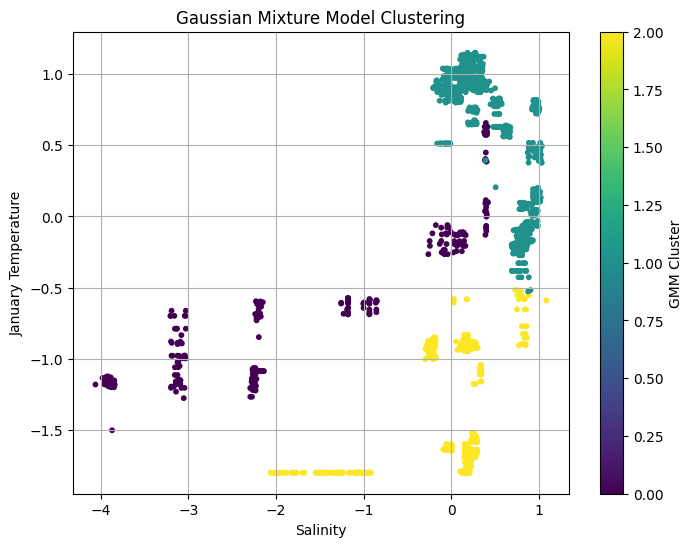

Silhouette Score for GMM: 0.5846670573920916


array([[-1.64844446, -0.65292717, -0.20096131],
       [ 0.40902137,  0.66901262,  0.60282786],
       [-0.08837533, -1.39509046, -1.49415071]])

In [ ]:
# This code performs Gaussian Mixture Model for clustering.
# Figure 12: Gaussian Mixture Model clustering

# Fit a Gaussian Mixture Model (GMM) on the normalized dataset
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(standardized_df[['salinity', 'January_temp', 'June_temp']])

# Add GMM cluster labels
standardized_df['GMM_Cluster'] = gmm_labels

# Plot the GMM clustering results using the first two features (salinity and January temperature)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    standardized_df['salinity'],
    standardized_df['January_temp'],
    c=standardized_df['GMM_Cluster'], cmap='viridis', s=10
)
plt.colorbar(scatter, label='GMM Cluster')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Salinity')
plt.ylabel('January Temperature')
plt.grid(True)
plt.show()

# Compute the silhouette score
gmm_silhouette_score = silhouette_score(
    standardized_df[['salinity', 'January_temp', 'June_temp']],  # Feature space
    gmm_labels  # Cluster labels from GMM
)

# print the result
print(f"Silhouette Score for GMM: {gmm_silhouette_score}")


# Display the cluster means
gmm_means = gmm.means_
gmm_means


 ## Figure 12: Gaussian Mixture Model Clustering

### Observations:
The scatter plot shows the results of the Gaussian Mixture Model (GMM) applied to the normalized dataframe, where the data was clustered into 3 clusters.

Cluster 0 (purple):
- Higher normalized values for salinity, January temperature, and June temperature, representing regions with stable and favorable environmental conditions for corals.

Cluster 1 (yellow):
- Low normalized values for all three features, representing regions with extreme environmental variability or less favorable conditions.

Cluster 2 (green):
-Moderate values for salinity and temperature, possibly representing transitional zones.
- These points are tighter clusters, suggesting ecological zones with specific but not extreme conditions.

### Which method did you like the most?

The two method I liked the most are the k-mean and the Gaussian Mixture Model clusterings. For the K-mean clusterings, I like it because it was the most straight forward to understand. it also gave high silouette score which validated the clusters in the results. The Gaussian Mixture Model was also straight forward with similar results that gave more certainity to the methods

### Which method did you like the least?

The DBSCAN is the least preferred because it was complicated to understand and it used to change the result everytime I run it until I made it fixed. The results are confusing and the clusters are hard to interpret.

### How did you score these unsupervised models?  

The scoring method used is the Silhouette score for all the clustering methods (K-mean, DBSCAN, GMM). In all methods it gave a high score. Indicating well-defined clusters that have high cohesion and are well-separated

### Did the output align with your geologic understanding?
At first I had in mind that the clusters should be 2 which means good environment for corals (present corals) and bad environment for corals (absent corals). However, it seems like there are three dominant clusters which I am interpreting as (good, moderate, harsh) environments.


### What did you want to learn more about?
I would want to learn more about the DBSCAN clustering as it was the most confusing to me. Also, I haven't explored the dimensionality reduction yet in my dataset. I would like to see what the results would mean.  


### Did you pre-process your data?
 Yes, the data was overall clean. However, I had to normalize the data before applying the clustering methods. I applied the Z-score normalization method for the dataset where each feature is scaled to have a mean of 0 and a standard deviation of 1. This ensures non-bias in clustering due the the outliers and big values.


### What was a decision you were most unsure about?
At first it was hard to choose if I should assign the cluster number to be 2 or 3 or just leave it based on the silhouette score. After some trials, I decided to use the silhouette score to make this decision.  